In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
pd.options.display.max_columns = 25
sns.set(style='darkgrid')

#validation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
#print the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#print the number of rows and columns of the dataset
print("Shape of the data :",df.shape)     

Shape of the data : (21597, 21)


In [6]:
#Concise Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#view different statistics like mean,percentile etc.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#checking for missing values in the dataset
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#sorting the values in increasing with respect to price
pd.DataFrame(df.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
view,0.397370
sqft_basement,0.323799
bedrooms,0.308787
lat,0.306692


Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 196, 7: 38, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


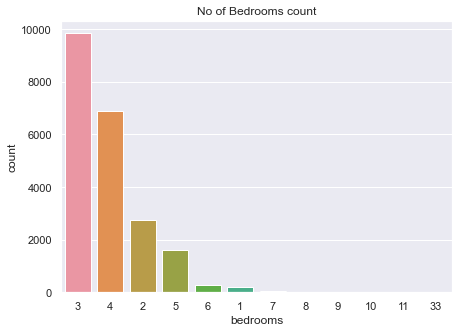

In [10]:
#Count of bedrroms
print(Counter(df.bedrooms))
sns.countplot(df.bedrooms,order=df.bedrooms.value_counts().index);
plt.title("No of Bedrooms count");

C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


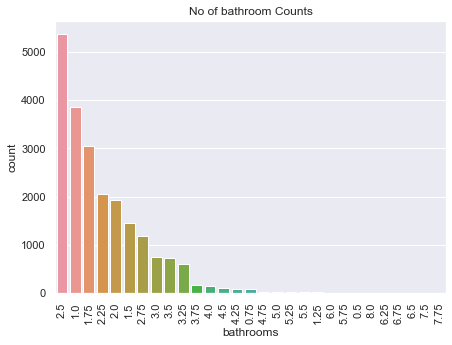

In [11]:
#Count of bathrooms
plt.xticks(rotation=90)
sns.countplot(df.bathrooms,order=df.bathrooms.value_counts().index);
plt.title('No of bathroom Counts');

Counter({1.0: 10673, 2.0: 8235, 1.5: 1910, 3.0: 611, 2.5: 161, 3.5: 7})


C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


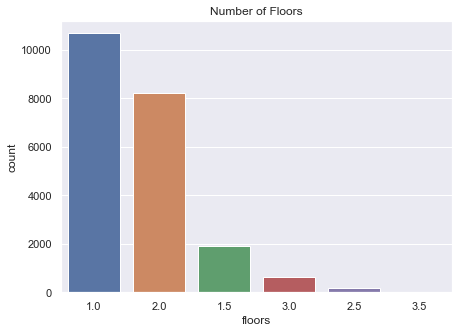

In [12]:
#Count of floors
print(Counter(df.floors))
sns.countplot(df.floors,order=df.floors.value_counts().index);
plt.title("Number of Floors");

Counter({0: 21434, 1: 163})


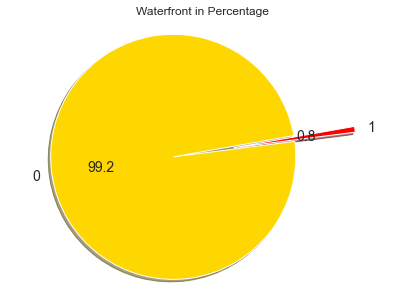

In [13]:
#Count of waterfront
print(Counter(df.waterfront))
#pie chart for a waterfront
plt.pie(df.waterfront.value_counts(),explode=[0,0.5],\
        autopct="%01.1f",labels=df.waterfront.unique(),shadow=True,startangle=10,colors=['gold','red'],\
        textprops={'fontsize': 14});
plt.axis("equal");
plt.title('Waterfront in Percentage');

C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


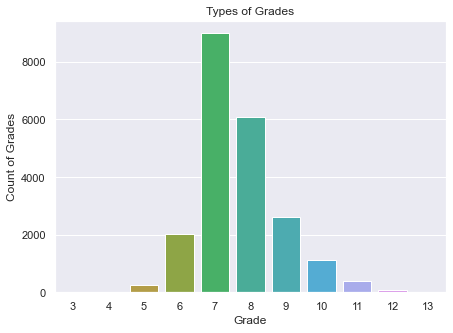

In [14]:
#bar graph for grading
sns.barplot(list(Counter(df.grade).keys()),list(Counter(df.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades");

In [15]:
#remove the unwanted columns from the data
unwanted = ['id','date']
df.drop(unwanted,axis=1,inplace=True)

In [16]:
df.head() #id and data variable coll is droped

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df['built_age'] = 2021 - df.yr_built 
df.drop('yr_built',axis=1,inplace=True)

In [18]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,66


In [19]:
X = list(df.iloc[:,1:].values) # independent variables
y = df.price.values # dependent variable

In [20]:
sn = StandardScaler()
X = sn.fit_transform(X)
X

array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.94367562,
        -0.26062671,  0.54467809],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.43288674,
        -0.18769961,  0.68085037],
       [-1.48249316, -1.45107268, -1.4272339 , ...,  1.07029196,
        -0.17219022,  1.29362563],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.39419807, -1.29364769],
       [-0.40290302,  0.49959749, -0.52317805, ..., -0.84151784,
        -0.42059702, -1.12343234],
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.41803046, -1.25960462]])

C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


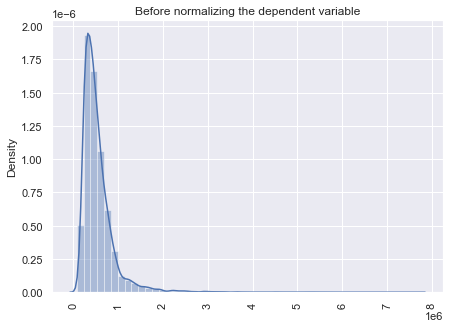

In [21]:
sns.distplot(y);
plt.xticks(rotation=90);
plt.title("Before normalizing the dependent variable");

C:\Users\G3_3500\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


This is also called as normal gaussian distribution


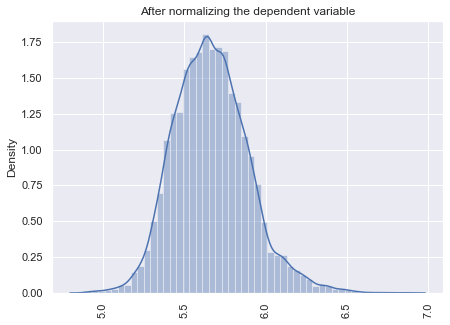

In [22]:
y = np.log10(y)
#we just normalized the y variable using log10 which is available in numpy package 
#now lets plot the data

sns.distplot(y);
plt.xticks(rotation=90);
plt.title("After normalizing the dependent variable");
print("This is also called as normal gaussian distribution")

In [23]:
X_train ,X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) #printing the shape of splited data

(17277, 18) (4320, 18) (17277,) (4320,)


In [24]:
model_line = LinearRegression(normalize=True,fit_intercept=True,n_jobs=1)
model_line.fit(X_train,y_train)

y_train_pred = model_line.predict(X_train)
y_pred = model_line.predict(X_test)


print("Train score:",r2_score(y_train,y_train_pred))
print("Test score:",r2_score(y_test,y_pred))

Train score: 0.7706400955847342
Test score: 0.7698922312576119


In [25]:
model = RandomForestRegressor(n_estimators=190,max_depth=100,random_state=25,max_features='auto',n_jobs=1)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


print("Train score:",r2_score(y_train,y_train_pred))
print("Test score:",r2_score(y_test,y_pred))

Train score: 0.982556045058574
Test score: 0.889156014412492
